# The Changing American Experiment- 

## The Data Story Inside Robert Penn Warren's *All the Kings Men*

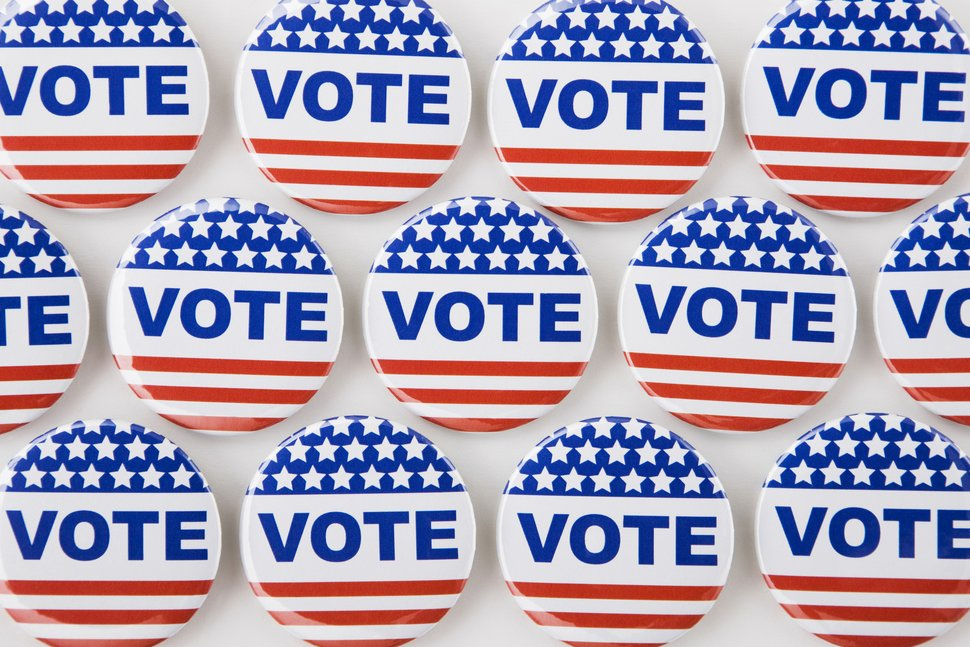

## American Political Realignment in the 20th Century

In the early part of the twentieth century, American politics underwent a dramatic transition. In the wake of the Civil War and the Industrial Revoultion, Republicans had gained a significant influence in the White House and Senate. However, the stock market crash under President Hoover and the start of the Great Depression realigned the American electorate heavilty behind the New Deal policies of Democratic President Roosevelt. 

More significantly, the way in which political power was gained by elected officials began to change. Robert Penn Warren's novel *All the Kings Men* showcases the way in which a demagogue utilized machine poltiics of the time to seize power in the moment. Using electoral college results dating back to the beginning of the American Republic, analyze trends between different parties and presidential power. 

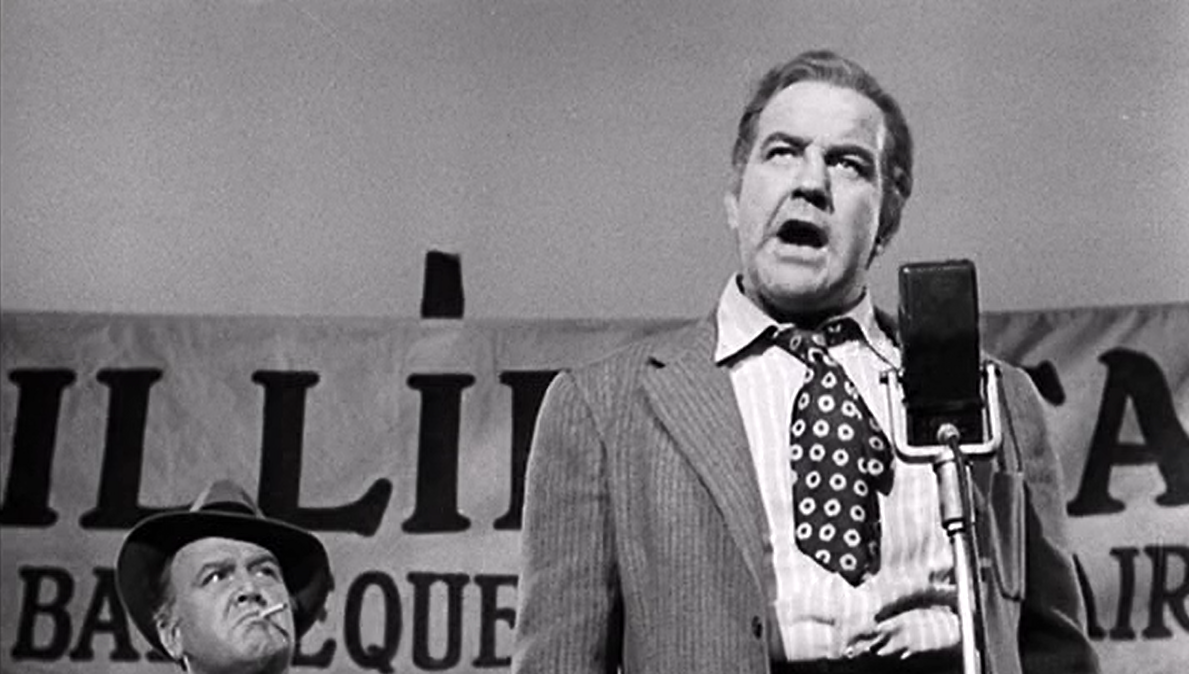

In [6]:
#### Prep code

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp


os.chdir("E:/DataStories")

ec = pd.read_csv("_data/ec_year_stage.csv")
ec.info()

hor = pd.read_csv("_data/house_state_stage.csv")
hor.info()

sen = pd.read_csv("_data/senate_state_stage.csv")
sen.info()

pres = pd.read_csv("_data/president_state_stage.csv")
pres.info()

recent = pd.read_csv("_data/ec_state_stage.csv")
recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
Year         106 non-null int64
Party        106 non-null object
Cantidate    106 non-null object
Votes        106 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17899 entries, 0 to 17898
Data columns (total 4 columns):
Year     17899 non-null int64
State    17899 non-null object
Party    17899 non-null object
Votes    17899 non-null int64
dtypes: int64(2), object(2)
memory usage: 559.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 4 columns):
Year     1497 non-null int64
State    1497 non-null object
Party    1497 non-null object
Votes    1497 non-null int64
dtypes: int64(2), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 4 columns):
Year     1097 non-null int64
State    1097 non-null o

In [173]:
#### Group By column value and sum

ecg = ec.groupby(["Year", "Party"], as_index = False).sum()

In [174]:
#### Pivot from long to wide format

ecw = ecg.pivot_table(index = ["Year"], columns = "Party", values = "Votes")

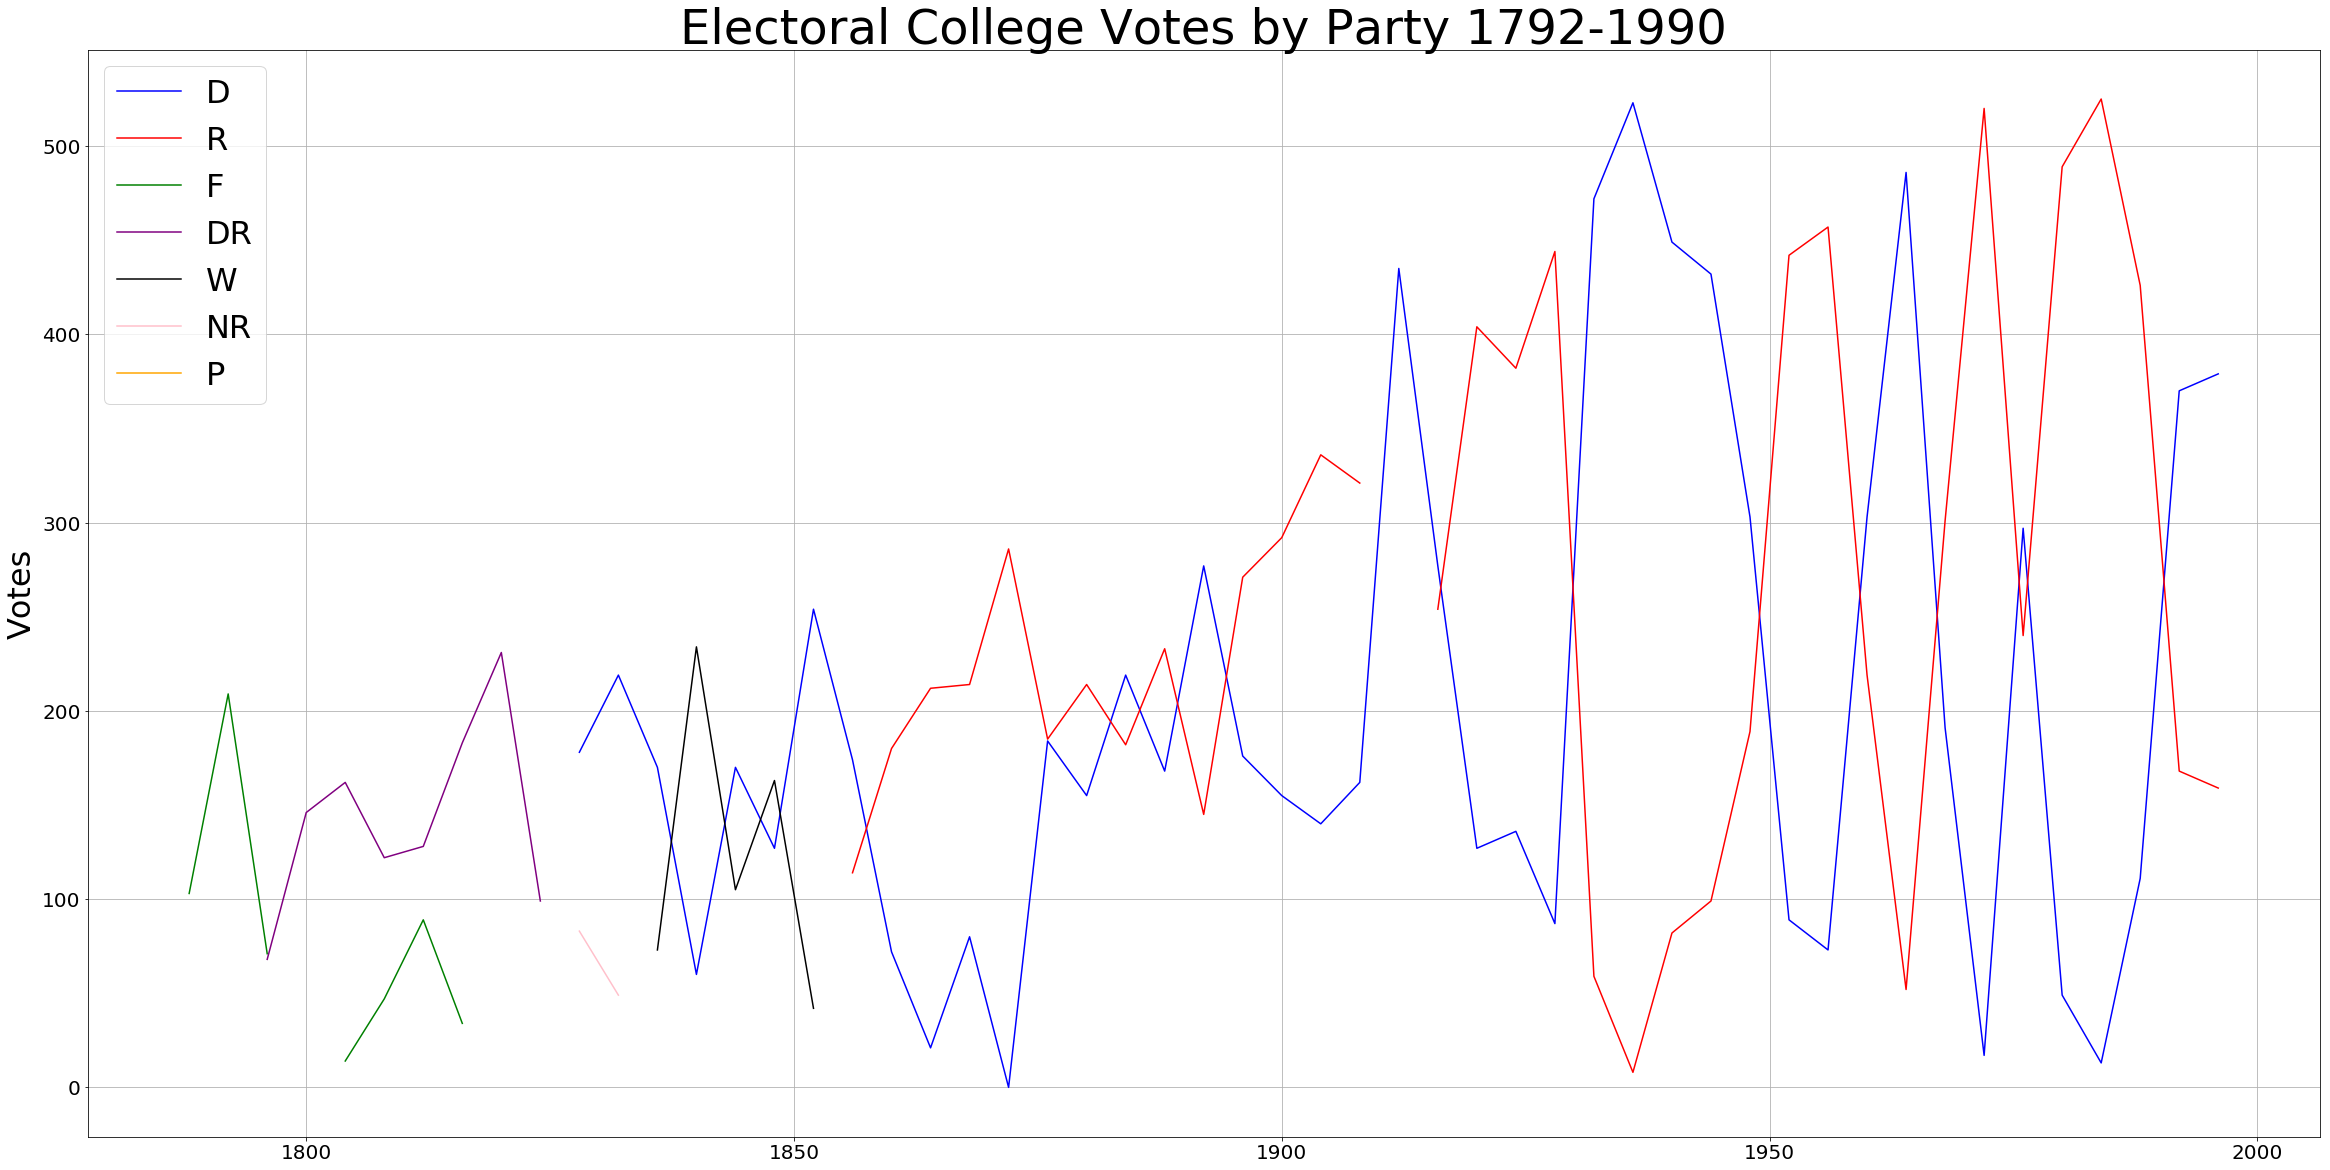

In [175]:
#### Create line graph with Matplotlib

plt.figure(figsize = (40, 20))
plt.grid()

plt.plot(ecw.D, color = "blue")
plt.plot(ecw.R, color = "red")
plt.plot(ecw.F, color = "green")
plt.plot(ecw.DR, color = "purple")
plt.plot(ecw.W, color = "black")
plt.plot(ecw.NR, color = "pink")
plt.plot(ecw.P, color = "orange")

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel("Votes", fontsize = 32)

plt.legend(fontsize = 32)
plt.title("Electoral College Votes by Party 1792-1990", fontsize = 48)
plt.savefig("_fig/electoral_college_plot.jpeg", bbox_inches = "tight")

### 1850-1950
Many of the changes happened from before the Civil War to after World War II.Isolate fro thsi range and evaluate. 

In [176]:
#### Subset by year

ec18 = ec[ec.Year > 1850]
ec50 = ec18[ec18.Year < 1950]

In [177]:
#### Group By column value and sum

ec50g = ec50.groupby(["Year", "Party"], as_index = False).sum()

In [178]:
#### Pivot from long to wide format 

ec50w = ec50g.pivot_table(index = ["Year"], columns = "Party", values = "Votes")

In [1]:
#### Create line graph with Matplotlib

plt.figure(figsize = (30, 20))
plt.grid()

plt.plot(ec50w.D, color = "blue")
plt.plot(ec50w.R, color = "red")

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel("Votes", fontsize = 32)

plt.legend(fontsize = 32)
plt.title("Electoral College Votes by Party 1850-1950", fontsize = 48)

NameError: name 'plt' is not defined

#### Discussion
1. What do you notice in the trends over time?
2. What elections appear to be the most transformational?
3. The Stark election takes place in the early 30s. What changes in the presidential elections do you see during that time?
4. Do you think that Stark's rise to power was part of a larger trend that had just begun, the culmination of a movement, or an isolated incident of demagoguer

### Realingment Theory
Realignment theory, first developed in the political scientist V. O. Key, Jr.'s 1955 article, "A Theory of Critical Elections", is that American elections routinely shift in swift, dramatic sweeps. Those sweeps have occurred at specific moments when reasons for party affiliation chnage due to signficiant circumstances (war, recession) or cultural changes due to generational shifts. The elections that have most clearly been identified as realignment elections are the presidential elections of 1800, 1828, 1860, 1896, 1932 and possibly 1968. 

[Theory of Critical Elections](_doc/vote_theory_doc.pdf)

Read Key's seminal text on realignment theory "A Theory of Critical Elections" for the folllowing section.

Since 1976, Republicans and Democrats have struggled to maintain control of differing groups as the demographics of the country began to change dramatically. Using the vote totals by state for both presidential and senatorial elections for the major parities, invesitgate the ways in which votes have shifted. 

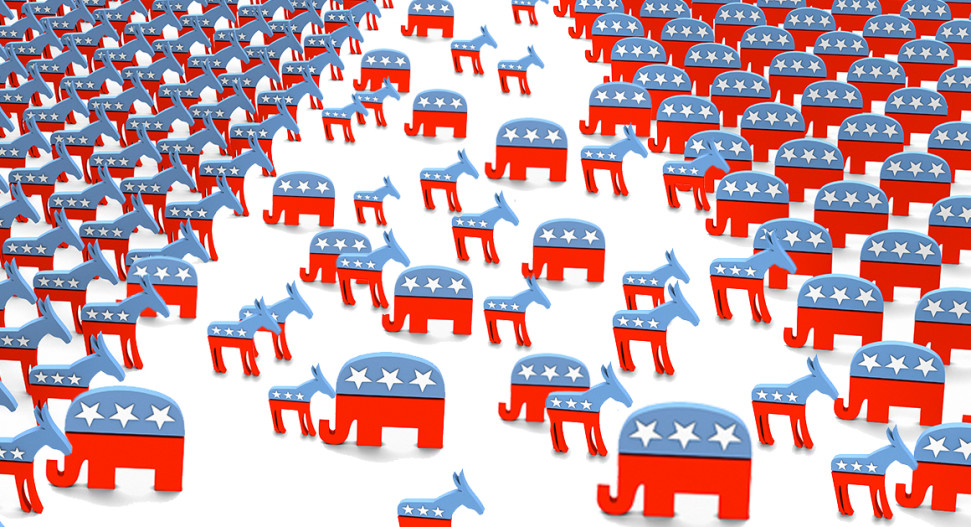

In [7]:
#### Stack dataframe by rows

feds = pd.concat([pres, sen, hor])

In [8]:
#### Group data by columns and sum

fedg = feds.groupby(["Year", "State", "Party"], as_index = False).sum()

In [9]:
#### Pivot from long to wide

fedw = fedg.pivot_table(index = ["Year", "State"], columns = "Party", values = "Votes")

In [10]:
#### Reset index

fedi = fedw.reset_index(level = ["Year", "State"])

In [12]:
#### Add a new column based on forumla

fedi["D"] = fedi["democrat"] - fedi["republican"]
fedi["R"] = fedi["republican"] - fedi["democrat"] 

In [13]:
#### Group by column value and sum

fed = fedi.groupby(["Year"], as_index = False).sum()

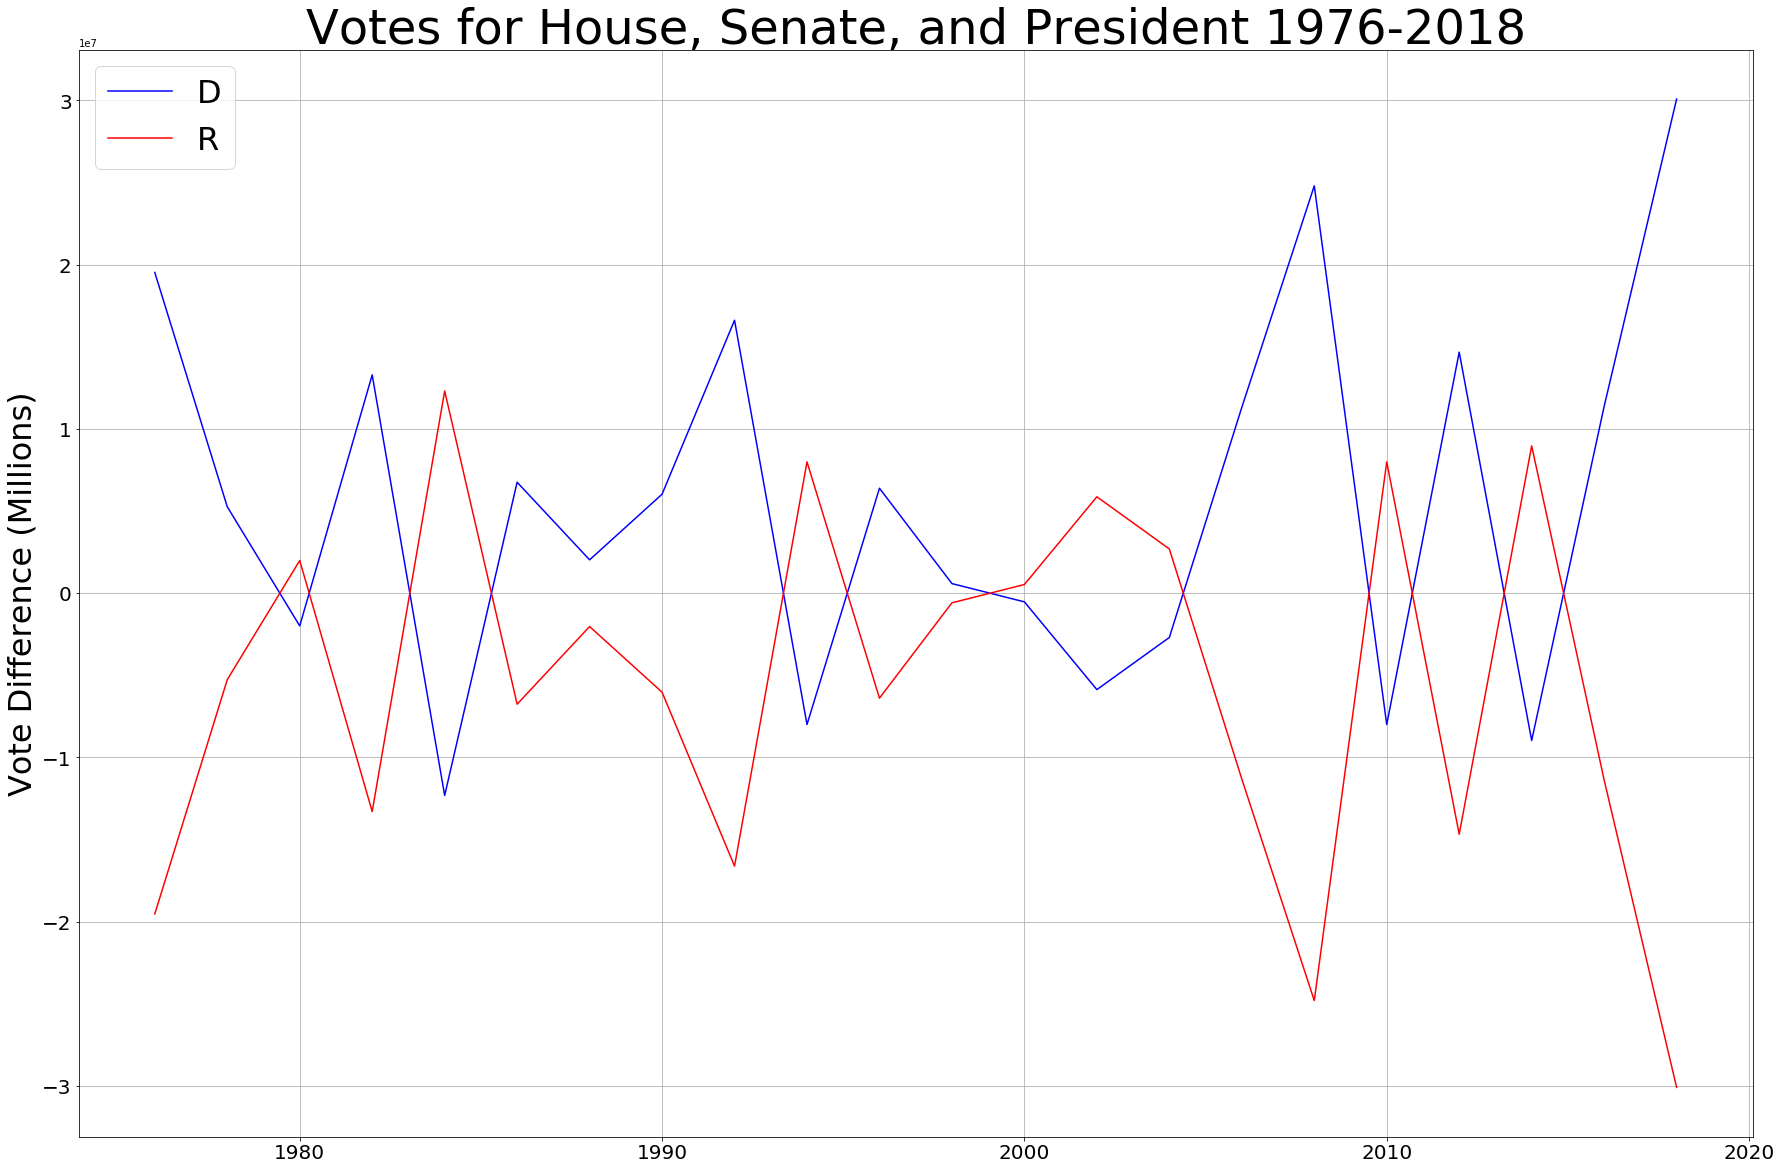

In [193]:
#### Create line graph with Matplotlib

plt.figure(figsize = (30, 20))
plt.grid()

plt.plot(fed.Year, fed.D, color = "b")
plt.plot(fed.Year, fed.R, color = "r")

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel("Vote Difference (Millions)", fontsize = 32)
plt.legend(["D", "R"], fontsize = 32)

plt.title("Votes for House, Senate, and President 1976-2018", fontsize = 48)
plt.savefig("_fig/house_senate_president_plot.jpeg", bbox_inches = "tight")

#### Discussion
1. Based on this dataset, have any realignments occurred since 1976?
2. Among the consensus realingment elections, there were trends or events that led up to those years. Do you see any of those trends in this plot?
3. Since this is vote count and not the electoral college, are there any discrepancies that you notice between the elctoral college results and this plot?

### Repeat for House, Senate, and Presidental Votes
Repeat the above process to show how each set of elections was unique through the same time period. 

In [194]:
#### Group data by columns and sum

presg = pres.groupby(["Year", "State", "Party"], as_index = False).sum()
seng = sen.groupby(["Year", "State", "Party"], as_index = False).sum()
horg = hor.groupby(["Year", "State", "Party"], as_index = False).sum()

In [195]:
#### Pivot from long to wide

presw = presg.pivot_table(index = ["Year", "State"], columns = "Party", values = "Votes")
senw = seng.pivot_table(index = ["Year", "State"], columns = "Party", values = "Votes")
horw = horg.pivot_table(index = ["Year", "State"], columns = "Party", values = "Votes")

In [196]:
#### Reset index

presi = presw.reset_index(level = ["Year", "State"])
seni = senw.reset_index(level = ["Year", "State"])
hori = horw.reset_index(level = ["Year", "State"])

In [197]:
#### Add new column based on formula

pre = presi.groupby(["Year"], as_index = False).sum()
sens = seni.groupby(["Year"], as_index = False).sum()
hors = hori.groupby(["Year"], as_index = False).sum()

In [198]:
pre["D"] = pre["democrat"] - pre["republican"]
pre["R"] = pre["republican"] - pre["democrat"] 

sens["D"] = sens["democrat"] - sens["republican"]
sens["R"] = sens["republican"] - sens["democrat"] 

hors["D"] = hors["democrat"] - hors["republican"]
hors["R"] = hors["republican"] - hors["democrat"] 

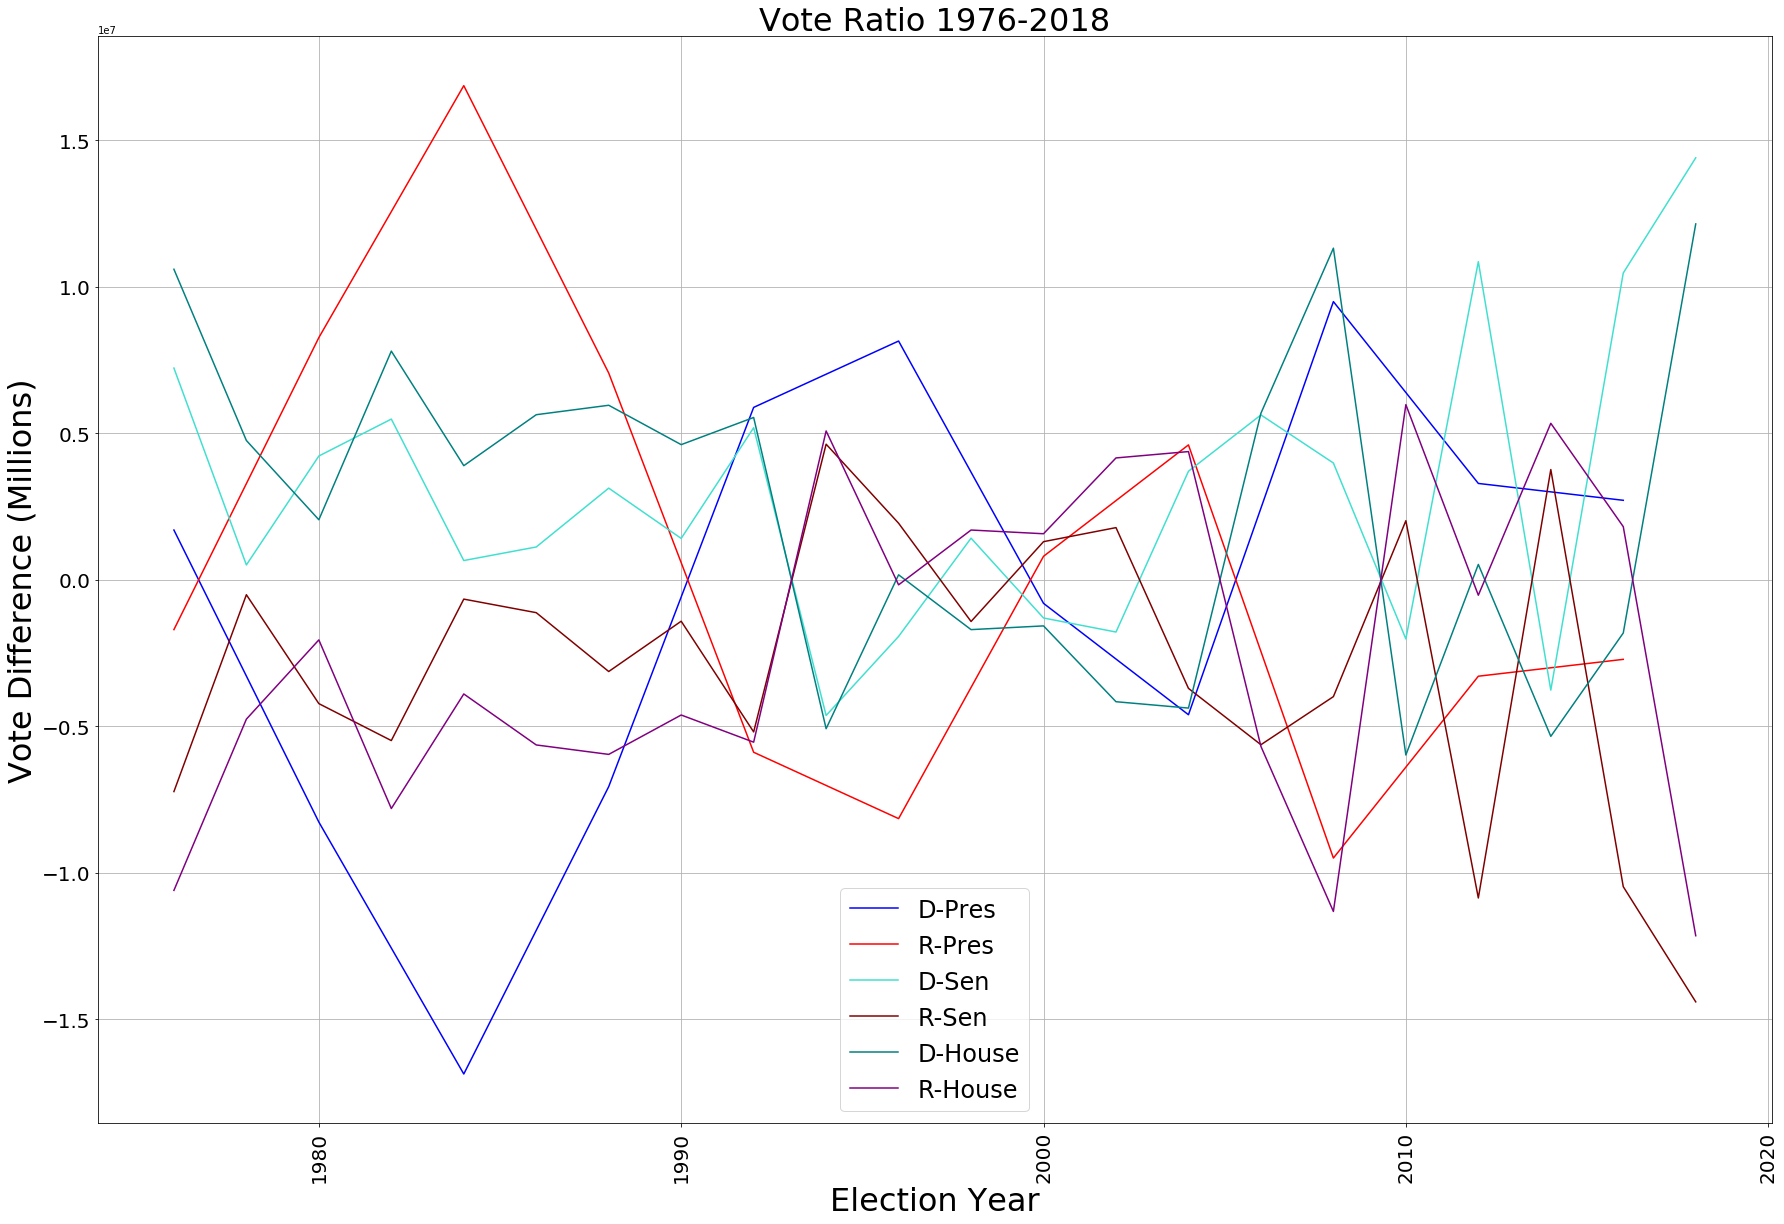

In [220]:
#### Create line graph with Matplotlib

plt.figure(figsize = (30, 20))
plt.xticks(rotation = 90, fontsize = 16)
plt.grid()

plt.plot(pre.Year, pre.D, color = "b")
plt.plot(pre.Year, pre.R, color = "r")

plt.plot(sens.Year, sens.D, color = "turquoise")
plt.plot(sens.Year, sens.R, color = "maroon")

plt.plot(hors.Year, hors.D, color = "teal")
plt.plot(hors.Year, hors.R, color = "purple")

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Election Year", fontsize = 32)
plt.ylabel("Vote Difference (Millions)", fontsize = 32)

plt.legend(["D-Pres", "R-Pres", "D-Sen", "R-Sen", "D-House", "R-House"], fontsize = 24)
plt.title("Vote Ratio 1976-2018", fontsize = 32)
plt.savefig("_fig/fed_separate_plot.jpeg", bbox_inches = "tight")

#### Discussion 
1. What does the above graph show?
2. Is there evidence for a relignment when the elections are separsted?
3. Look at the results from 2016 and 2018. Compare those vote totals to the actual election results and the resulting parties in power. What do you notice?

## The 2016 Presidential Election

The 2016 Presdiential election saw one of the most notable upsets based on predictions since 1948 9Remeber the photo of President Truman holding the false newspaper headline?). Using the data from 2012 and 2016, evaluate the differences among states that changed from 2012 to 2016. Create descriptive plots as well as an illustrative map.

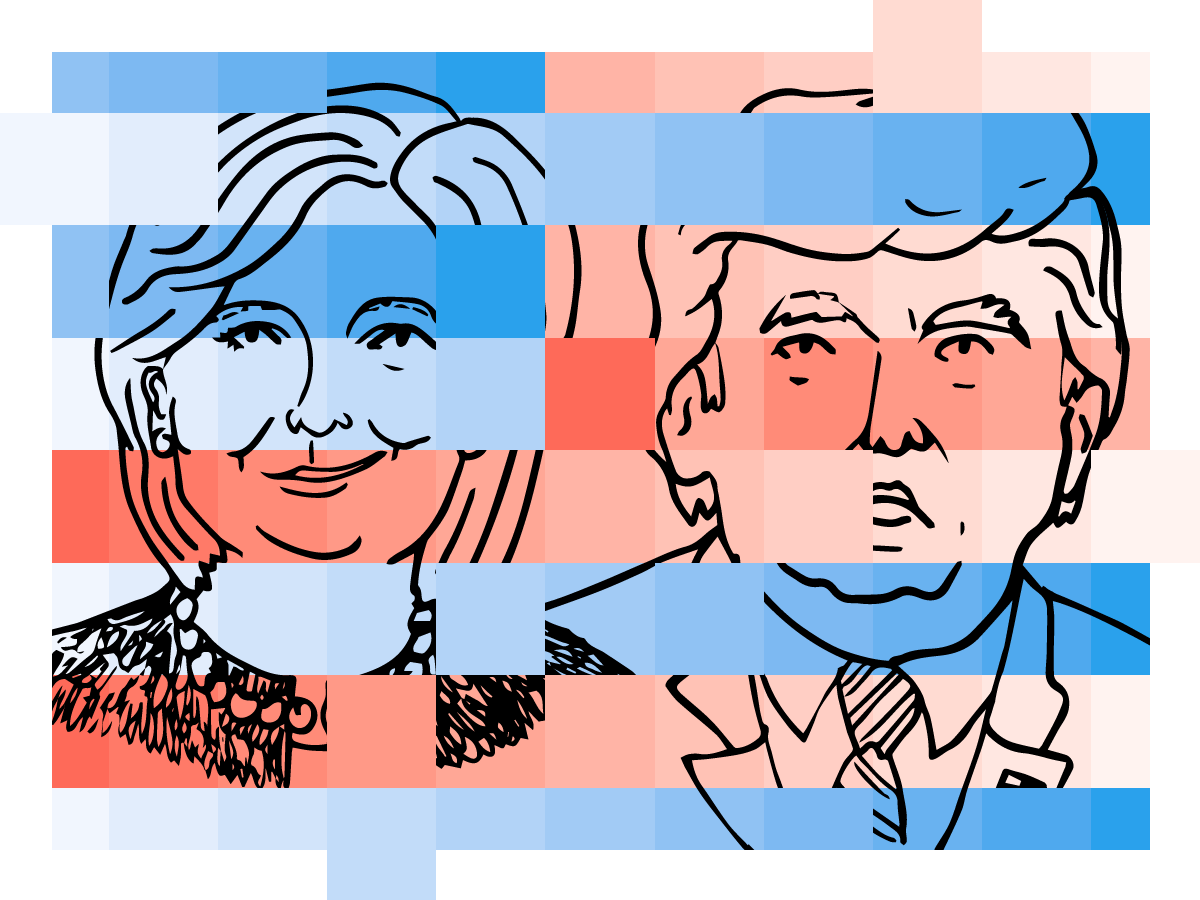

#### Create Differential, Subset for 2016 and 2012, and Group by Party for Raw Vote Dataset

In [16]:
#### Add new column based on formula

fedi["D"] = fedi["democrat"] - fedi["republican"]
fedi["R"] = fedi["republican"] - fedi["democrat"]
recent["Dem"] = recent["democrat"] - recent["republican"]
recent["Rep"] = recent["republican"] - recent["democrat"] 

In [17]:
#### Subset by column string value

trump = fedi[fedi.Year == 2016]
obama = fedi[fedi.Year == 2012]
fourty5 = recent[recent.Year == 2016]
fourty4 = recent[recent.Year == 2012]

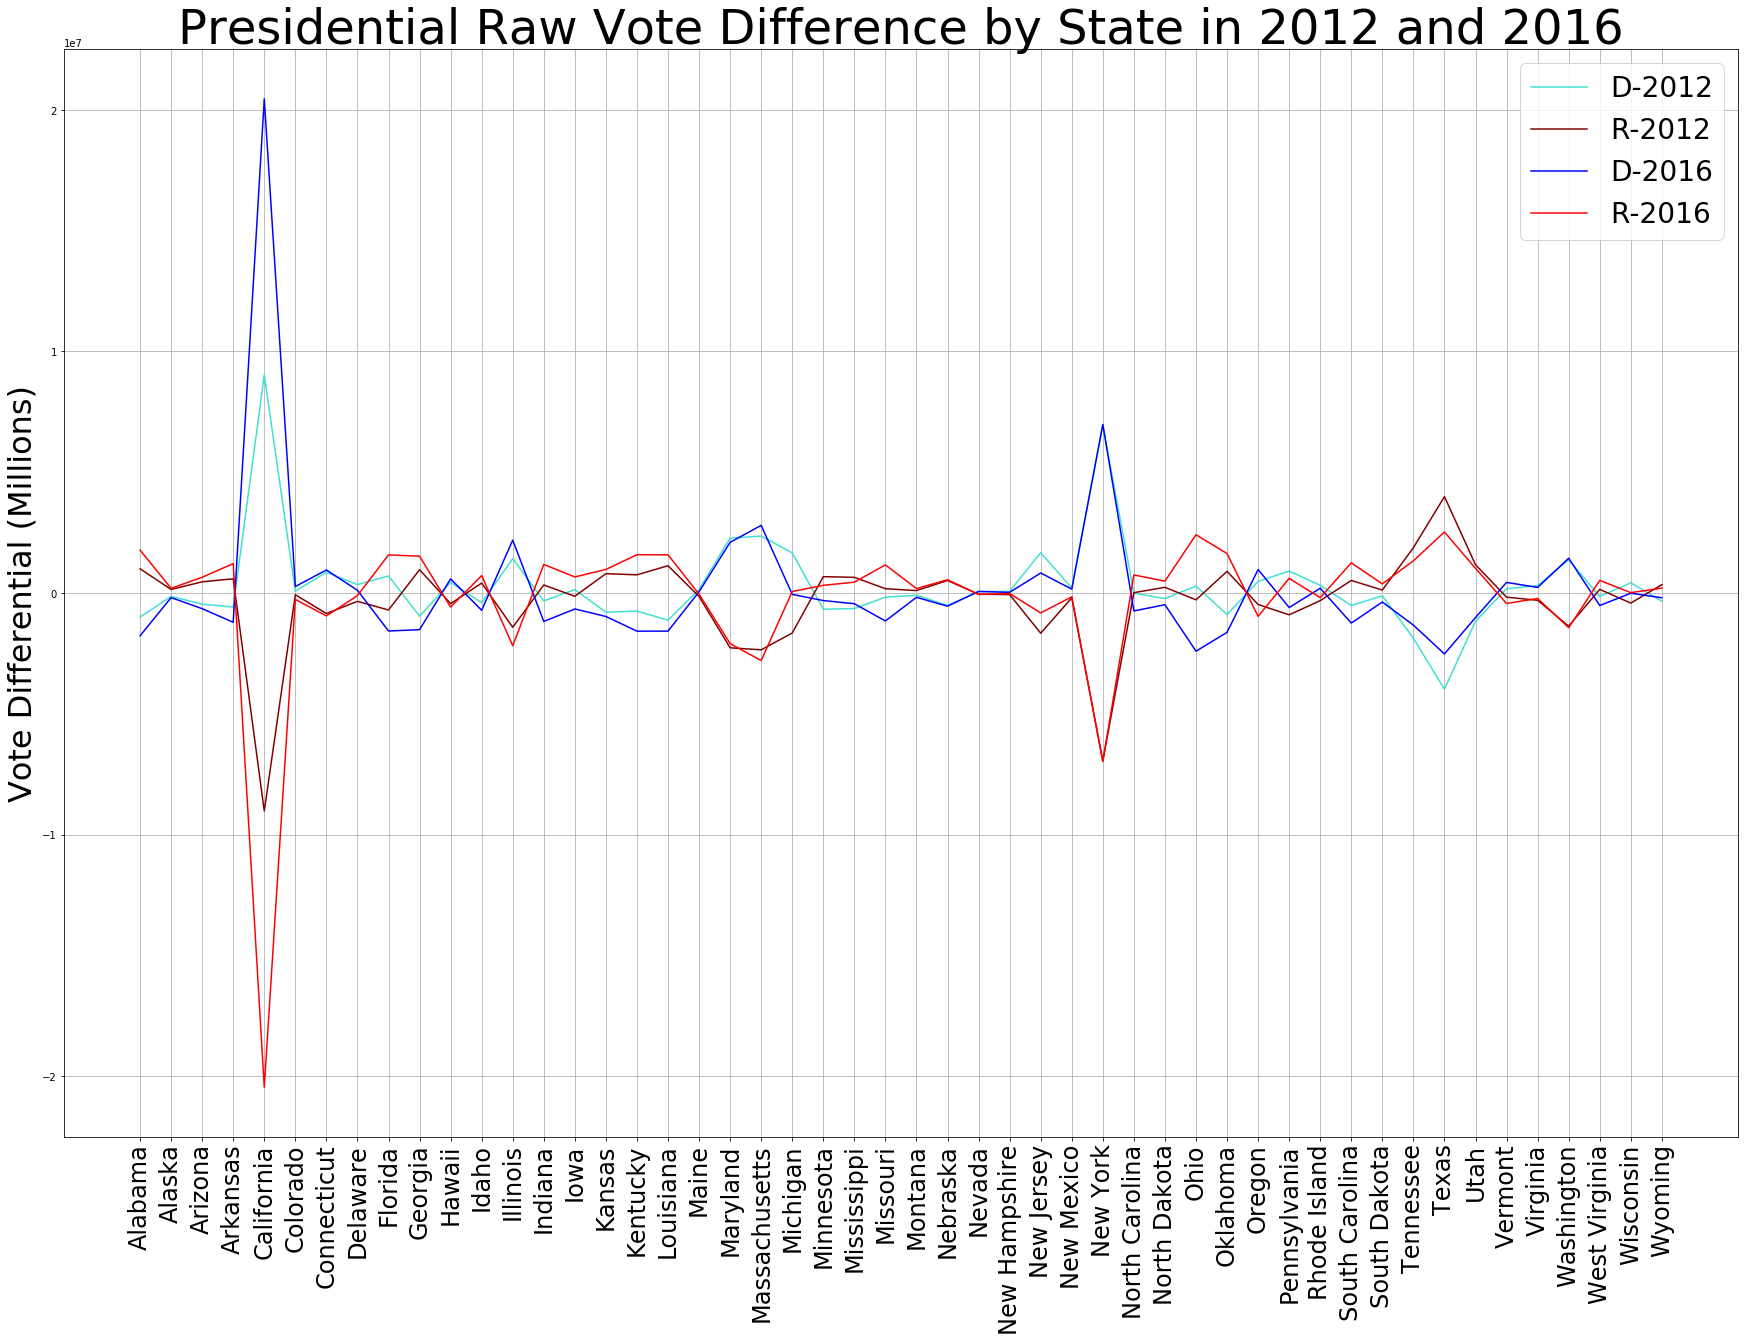

In [218]:
#### Create line graph with Matplotlib

plt.figure(figsize = (30, 20))
plt.grid()
                       
plt.plot(obama.State, obama.D, color = "turquoise")
plt.plot(obama.State, obama.R, color = "maroon")
plt.plot(trump.State, trump.D, color = "blue")
plt.plot(trump.State, trump.R, color = "red")

plt.xticks(rotation = 90, fontsize = 24)
plt.ylabel("Vote Differential (Millions)", fontsize = 32)

plt.legend(["D-2012", "R-2012", "D-2016", "R-2016"], fontsize = 28)
plt.title("Presidential Raw Vote Difference by State in 2012 and 2016", fontsize = 48)
plt.savefig("_fig/obama_trump_plot.jpeg", bbox_inches = "tight")

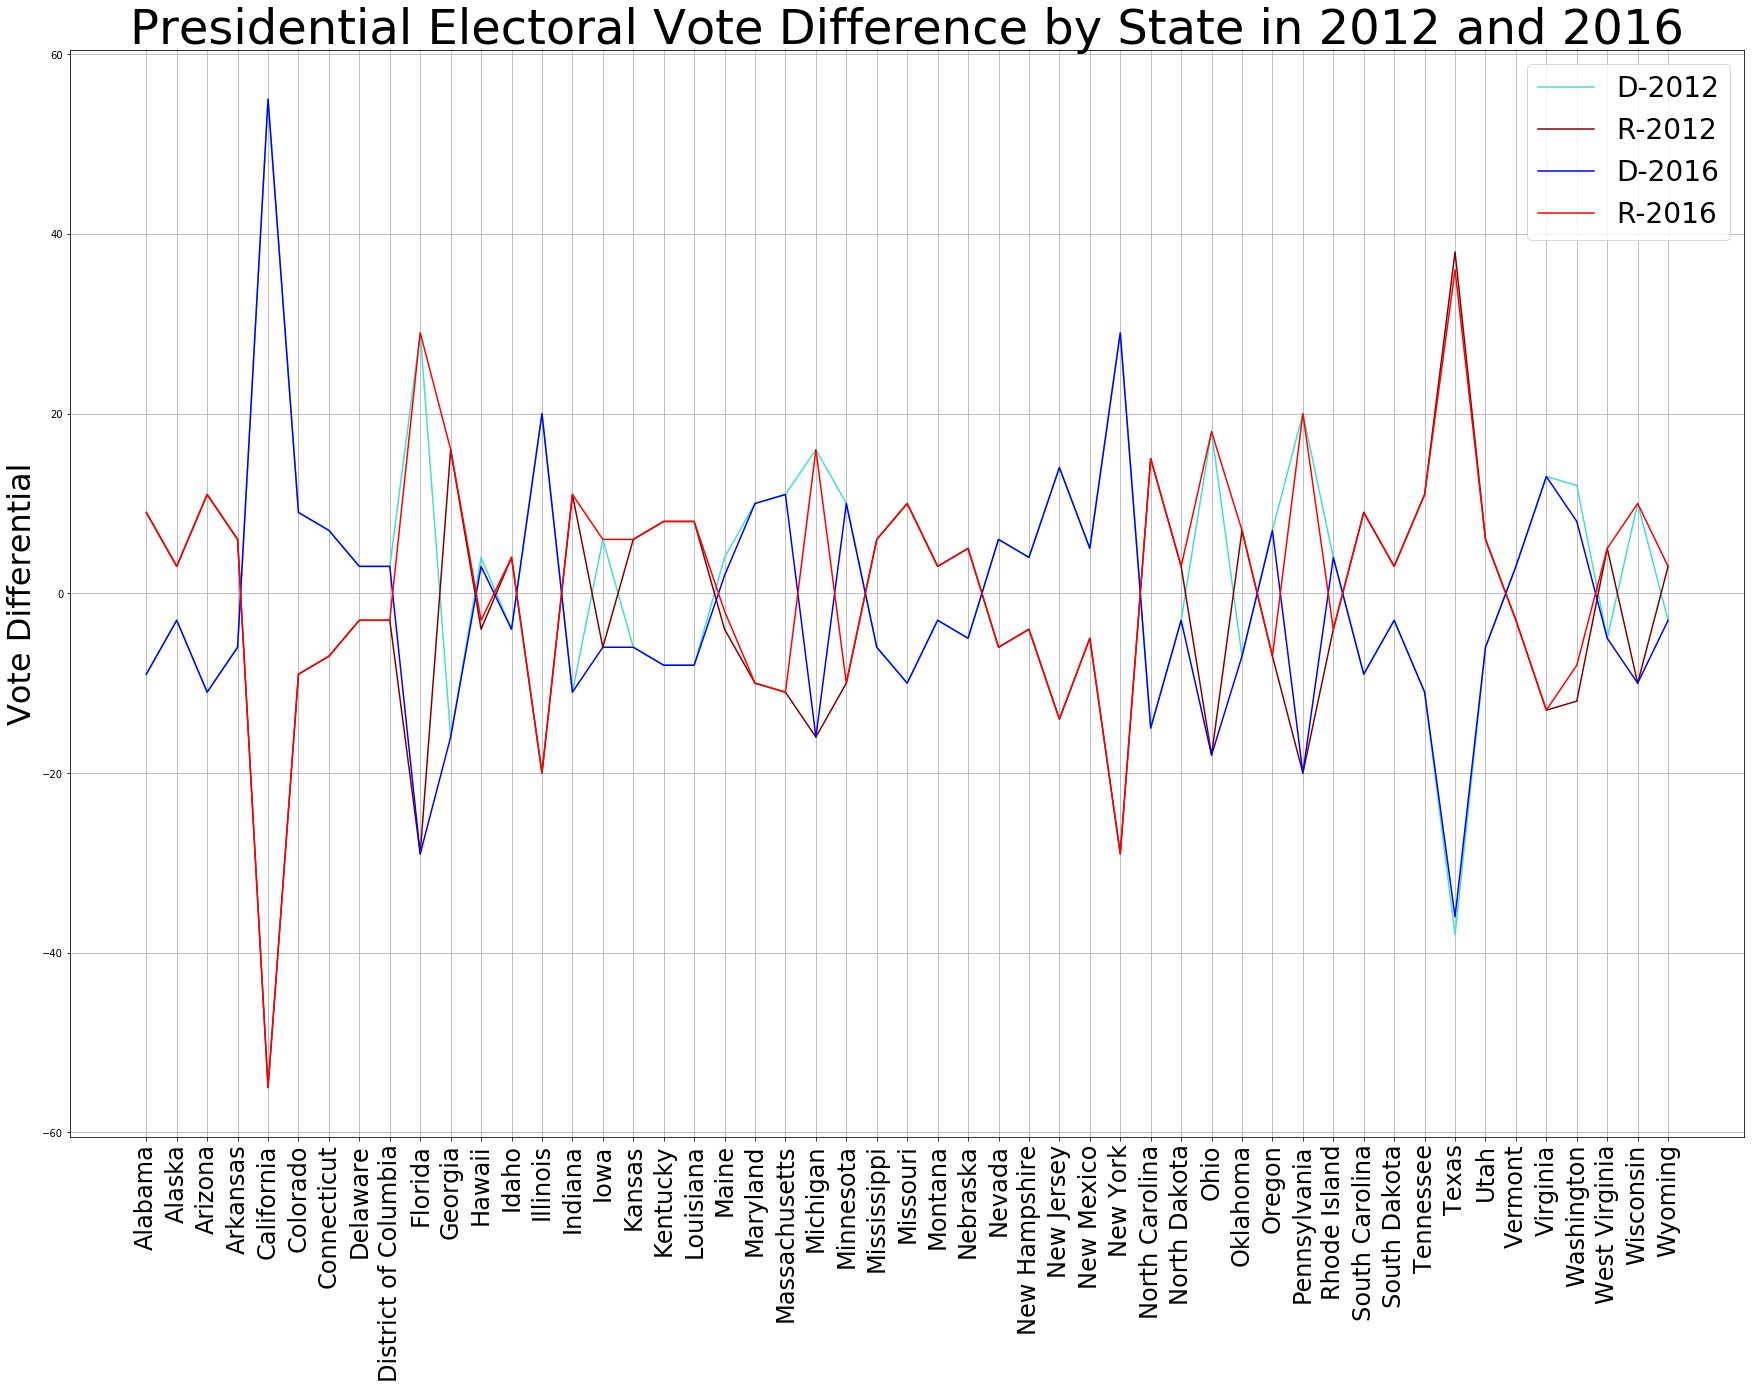

In [219]:
plt.figure(figsize = (30, 20))
plt.grid()
                       
plt.plot(fourty4.State, fourty4.Dem, color = "turquoise")
plt.plot(fourty4.State, fourty4.Rep, color = "maroon")
plt.plot(fourty5.State, fourty5.Dem, color = "blue")
plt.plot(fourty5.State, fourty5.Rep, color = "red")

plt.xticks(rotation = 90, fontsize = 24)
plt.ylabel("Vote Differential", fontsize = 32)

plt.legend(["D-2012", "R-2012", "D-2016", "R-2016"], fontsize = 28)
plt.title("Presidential Electoral Vote Difference by State in 2012 and 2016", fontsize = 48)
plt.savefig("_fig/fourty4_fourty5_plot.jpeg", bbox_inches = "tight")

### Votes, the Electoral College, and Swing States
Due to the changing nature of the electorate, what comprises a reliable Republican or Democratic state has drastically changed. While Colorado used to be more "red", the increase in tech jobs on the front range has made it relaibly "blue". While traditionally industrial workers were unionized and supported Democrats, the lowered impact of unions in 2016 led Ohio to become solidly red. These changes have led to a strong shift towards the upper midwest as a key part of strategies for electoral victory.

[Wahsington Post 2016 Results](_doc/vote_wapo_doc.pdf)

Using the electoral college dataset, create a visual map to show what states shifted between 2012 and 2016 in both raw total and electoral college totals. 

In [207]:
#### Import shape file

shape = gp.read_file("_shape/tl_2017_us_state/tl_2017_us_state.shp")
shape["State"] = shape["NAME"]

In [208]:
#### Join with geographical data with Geopandas

map12 = pd.merge(shape, obama, on = "State")
map16 = pd.merge(shape, trump, on = "State")

In [209]:
#### Drop row by column string value

map44 = map12[(map12.State != "Alaska") & (map12.State != "Hawaii")]
map45 = map16[(map12.State != "Alaska") & (map12.State != "Hawaii")]

In [211]:
#### Switch to mercatur projection with Geopandas

map44m = map44.to_crs({'init': 'epsg:4326'})
map45m = map45.to_crs({'init': 'epsg:4326'})

In [212]:
#### Subsets by condition

map44D = map44m[map44.D > 0]
map44R = map44m[map44.R > 0]
map45D = map45m[map45.D > 0]
map45R = map45m[map45.R > 0]

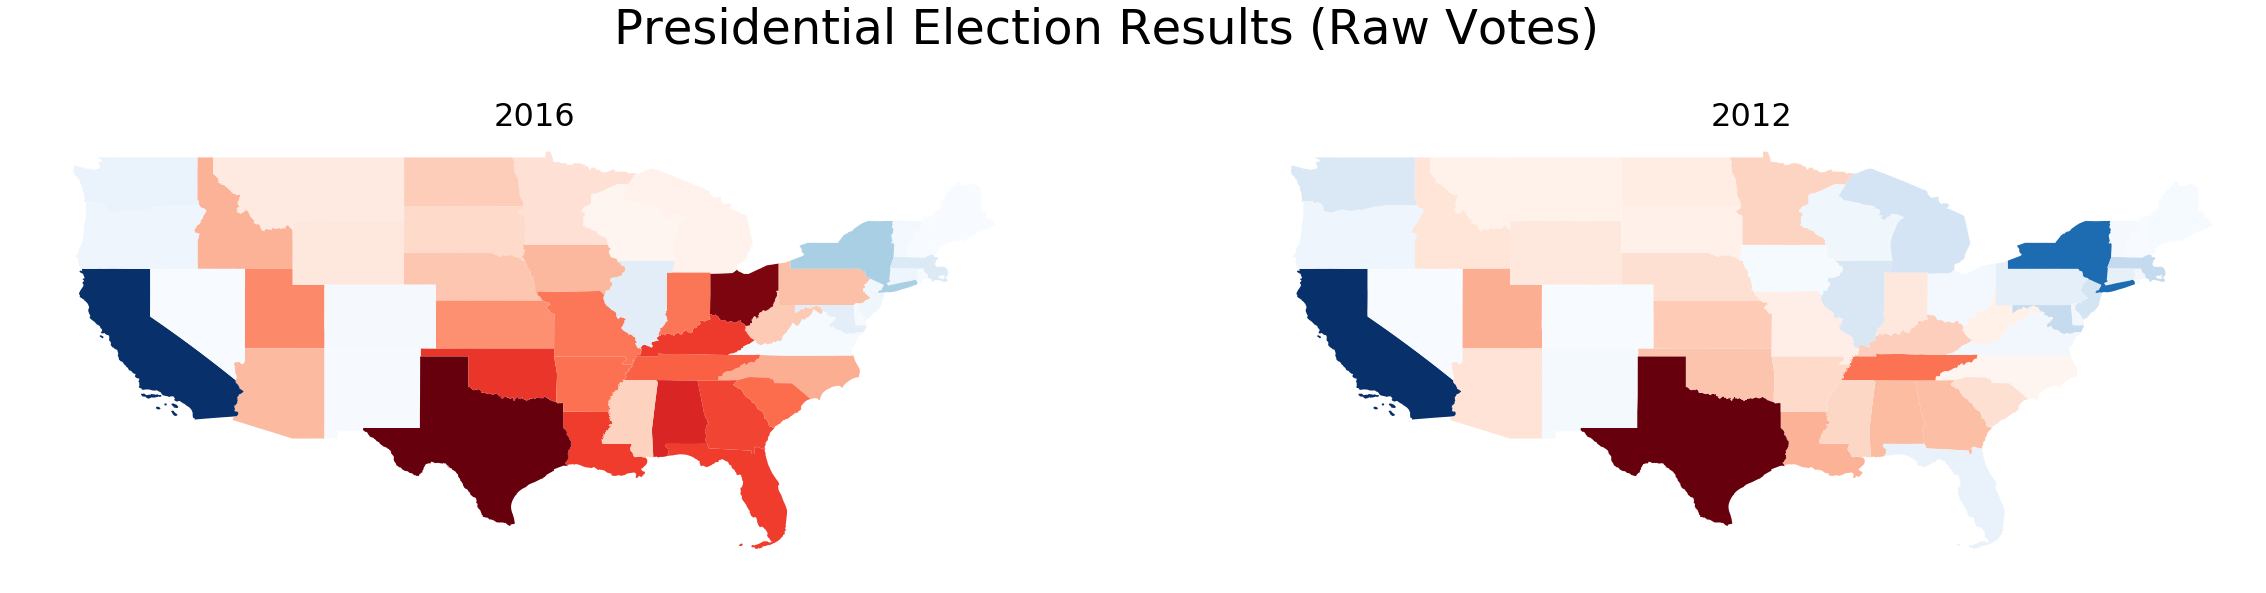

In [213]:
#### Create choropleth map with Geopandas

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (40, 10))

map45R.plot(column = "R", cmap = "Reds", ax = ax1, legend = False)
map45D.plot(column = "D", cmap = "Blues", ax = ax1, legend = False)
ax1.set_title("2016", fontsize = 32)
ax1.axis("off")

map44R.plot(column = "R", cmap = "Reds", ax = ax2, legend = False)
map44D.plot(column = "D", cmap = "Blues", ax = ax2, legend = False)
ax2.set_title("2012", fontsize = 32)
ax2.axis("off")

fig.suptitle("Presidential Election Results (Raw Votes)", fontsize = 48)
fig.savefig("_fig/rawvote_map_fig.jpeg", bbox_inches = "tight")

In [214]:
#### Join with geographical data with Geopandas

mapO = pd.merge(map44, fourty4, on = "State")
mapT = pd.merge(map45, fourty5, on = "State")

In [215]:
#### Subset by condition

mapOD = mapO[mapO.Dem > 0]
mapOR = mapO[mapO.Rep > 0]
mapTD = mapT[mapT.Dem > 0]
mapTR = mapT[mapT.Rep > 0]

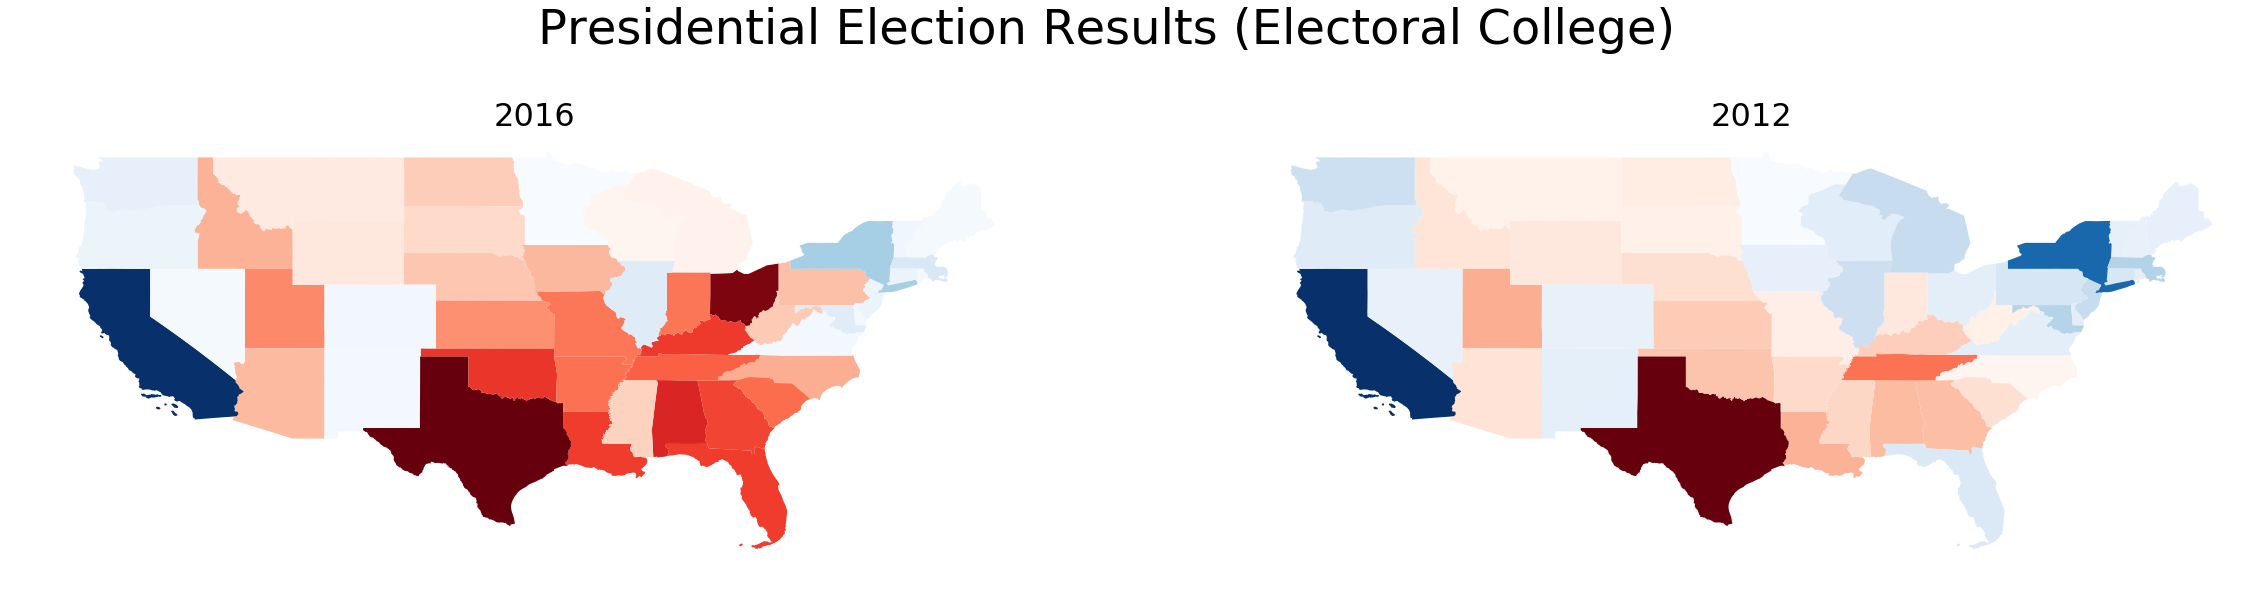

In [216]:
#### Create Choropleth map with Geopandas

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (40, 10))

mapTR.plot(column = "R", cmap = "Reds", ax = ax1, legend = False)
mapTD.plot(column = "D", cmap = "Blues", ax = ax1, legend = False)
ax1.set_title("2016", fontsize = 32)
ax1.axis("off")

mapOR.plot(column = "R", cmap = "Reds", ax = ax2, legend = False)
mapOD.plot(column = "D", cmap = "Blues", ax = ax2, legend = False)
ax2.set_title("2012", fontsize = 32)
ax2.axis("off")

fig.suptitle("Presidential Election Results (Electoral College)", fontsize = 48)
fig.savefig("_fig/electoral_map_fig.jpeg", bbox_inches = "tight")

#### Discussion
1. Based on the results from 2012 and 2016, what do you notice about differences between those two years?
2. Based on the size of the electoral college votes in each state, what states were most important in 2016?
3. Based on the raw and electoral vote plots, what do you notice about the differnece between states?

## How data can help understand our elections
#### Electoral Relignment Through History
Through American history, certaine lections have witnessed a transfer a power due to population changes or major events. When comparing electoral votes for over 200 years, a new relaignment may be occuring in the early part of the 21st century. However, due to the way the Electoral College distributes votes, that may not lead to a transfer a of power soon. 

#### 2016 Election
In the 2016 election, DEmocrats lost the upper midwest as well as Florida due to minute voter shifts related to party relaignment. While there is evidence that the 2018 election showed a shift back, these swing states hold a key path to victory for any cantidate in 2020 outside of broad appeal. Increasingly, a discrepancy between raw votes and electoral votes in the presidential election has been occuring and may continue for the future.

#### Discussion
1. Did Willie Stark gain power because he took advantage of a moment or was he the product of changing electoral desires?
2. How does an analysis of the data change the way you percive the election results or the trends between what party is in power?
3. How beneficial is it to forecast with a data driven approach? 
4. How can data be used in a way that will negatively impact the electorate? If If Willie Stark ahd access to data like this, how would he use it?
5. How would you use this data to create a stratgey for 2020 for either party?

## Battleground Florida: 2020

Florida has one of the highest electoral vote count (29) as well as being a relatively "purple" swing state. In the 2020 election, both parties will to try to win the state as the vote results have traditionally been very close. Using the 2016 results, make a graph that shows the difference in votes and electors won in 2016 nationwide. Then use the state 2016 results to determine the easiest ways for Dems to regain the White House and for Republicans to defend it. Based on your results, determine how important Florida is for both 2020 campaigns. 

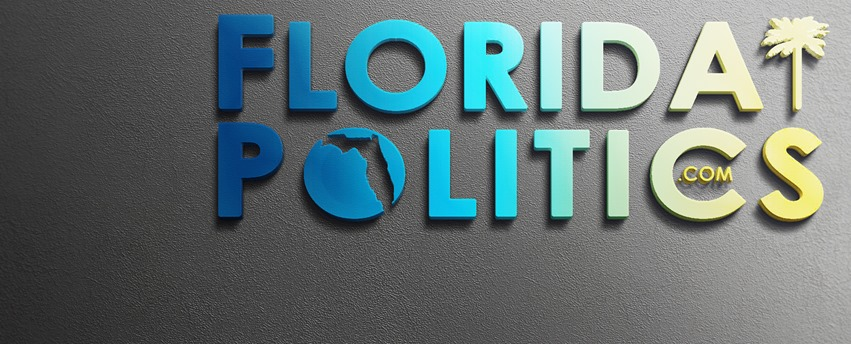

#### [Answer](#answer_key)
******
******
******
******
******
******
******
******
******
******
******
******
******
******
### <a id='answer_key'> Answer </a>

In [99]:
#### Prep code

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp


os.chdir("E:/DataStories")

vote = pd.read_csv("_data/vote_fed_stage.csv", encoding = "ISO-8859-1")
vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
State    52 non-null object
Dvote    52 non-null int64
Rvote    52 non-null int64
Rcol     52 non-null int64
Dcol     52 non-null int64
EC       52 non-null int64
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


In [53]:
#### Subset Data by Column Value

us = vote[vote.State == "US"]
us.head()

,State,Dvote,Rvote,Rcol,Dcol
51,US,65677168,62692411,304,227


No handles with labels found to put in legend.


Text(0.5, 0.95, 'Raw and Electoral College Votes in 2016')

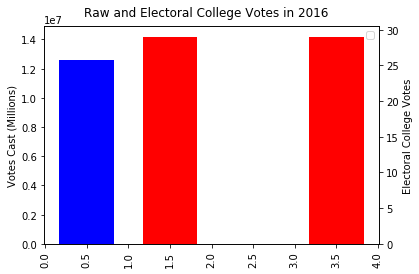

In [104]:
#### Create Multiple Plots with Different Y Axis

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
plt.xticks(rotation = 90)

ax1.bar(0.5, us.Dvote, color = "blue", width = 0.66)
ax1.bar(1.5, us.Rvote, color = "red", width = 0.66)
ax1.set_ylabel("Votes Cast (Millions)")

ax2 = ax1.twinx()

ax2.bar(2.5, us.Dcol, color = "blue", width = 0.66)
ax2.bar(3.5, us.Rcol, color = "red", width = 0.66)
ax2.set_ylabel("Electoral College Votes")

plt.legend()
fig.suptitle("Raw and Electoral College Votes in 2016", y = 0.95, fontsize = 12)

In [72]:
#### Simple Math and Print

print("Electors needed for Democratic win in 2020 =", (304 - 270))

Electors needed for Democratic win in 2020 = 34


In [100]:
#### Create a new function column, Susbet by Values, Sort by Column Value, Round and Print

vote["flip"] = (vote["Rvote"] - vote["Dvote"])/vote["EC"]
subset = vote[vote.flip > 0]
sort = subset.sort_values(by = ["flip"], ascending = True)
flip = sort.round(1)
print(flip)

             State    Dvote    Rvote  Rcol  Dcol  EC     flip
46        Michigan  2268839  2279543    16     0  16    669.0
48    Pennsylvania  2926441  2970733    20     0  20   2214.6
40       Wisconsin  1382536  1405284    10     0  10   2274.8
49         Florida  4504975  4617886    29     0  29   3893.5
41         Arizona  1161167  1252401    11     0  11   8294.0
44  North Carolina  2189316  2362631    15     0  15  11554.3
45         Georgia  1877963  2089104    16     0  16  13196.3
21          Alaska   116454   163387     3     0   3  15644.3
50           Texas  3877868  4685047    36     0  36  22421.6
30            Iowa   653669   800983     6     0   6  24552.3
47            Ohio  2394164  2841005    18     0  18  24824.5
38  South Carolina   855373  1155389     9     0   9  33335.1
22         Montana   177709   279240     3     0   3  33843.7
33            Utah   310674   515211     6     0   6  34089.5
32     Mississippi   485131   700714     6     0   6  35930.5
24    So

In [102]:
subset = vote[vote.flip < 0]
sort = subset.sort_values(by = ["flip"], ascending = False)
flip = sort.round(1)
print(flip)

            State     Dvote     Rvote  Rcol  Dcol   EC     flip
11  New Hampshire    348526    345790     0     4    4   -684.0
9       Minnesota   1367705   1322949     0    10   10  -4475.6
10         Nevada    539260    512058     0     6    6  -4533.7
51             US  65677168  62692411   304   227  608  -4909.1
20          Maine    357735    335593     1     3    4  -5535.5
13     New Mexico    385234    319667     0     5    5 -13113.4
1        Colorado   1338870   1202484     0     9    9 -15154.0
18       Virginia   1981473   1769443     0    13   13 -16310.0
3        Delaware    235603    185127     0     3    3 -16825.3
16   Rhode Island    252525    180543     0     4    4 -17995.5
17        Vermont    178573     95369     0     3    3 -27734.7
15         Oregon   1002106    782403     0     7    7 -31386.1
2     Connecticut    897572    673215     0     7    7 -32051.0
12     New Jersey   2148278   1601933     0    14   14 -39024.6
5          Hawaii    266891    128847   